In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data.csv', usecols=['horsepower', 'price'])

In [3]:
df.head()

,horsepower,price
0,111.0,13495.0
1,111.0,16500.0
2,154.0,16500.0
3,102.0,13950.0
4,115.0,17450.0


In [4]:
df.shape
# 200 baris 2 kolom (horse power dan price)

(200, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   horsepower  200 non-null    float64
 1   price       200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [6]:
df.describe()
# Melihat statistik dari data

,horsepower,price
count,200.000000,200.000000
mean,103.320000,13230.375000
std,37.468615,7960.155239
min,48.000000,5118.000000
25%,70.000000,7775.000000
50%,95.000000,10320.000000
75%,116.000000,16500.750000
max,262.000000,45400.000000


In [7]:
# Mengecek data
df.isnull().sum()

horsepower    0
price         0
dtype: int64

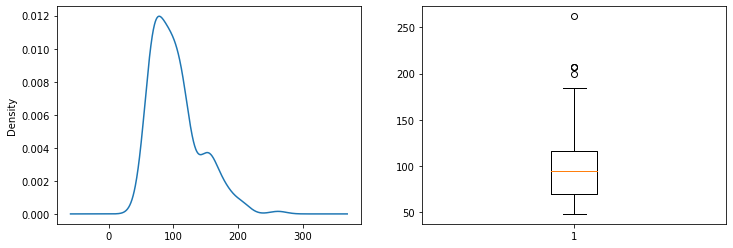

In [8]:
#Univariate analysis horsepower.
#Melihat distribusi dari horsepower.
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['horsepower'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['horsepower'])
plt.show()

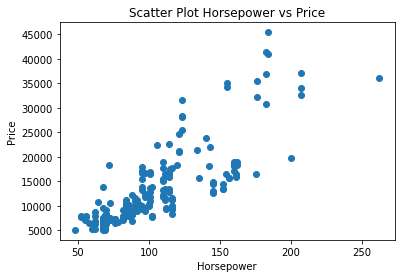

In [9]:
#Bivariate analysis horsepower dan price.
#Menggunakan scatter plot.
plt.scatter(df['horsepower'], df['price'])
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatter Plot Horsepower vs Price')
plt.show()

In [10]:
#Mengetahui nilai korelasi dari horsepower dan price.
#Nilai korelasinya adalah 0.81 termasuk kategori sangat tinggi.
df.corr()

,horsepower,price
horsepower,1.000000,0.811097
price,0.811097,1.000000


In [11]:
# Tahap Modelling

In [12]:
# Variabel X dan Y
x = df['horsepower'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [14]:
# Membuat objek linear regresi
lin_reg = LinearRegression()

In [16]:
# Masukkan training model
lin_reg.fit(x_train,y_train)

LinearRegression()

In [17]:
# Melihat nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)
print("Persamaan")
print("Y = "+str(lin_reg.intercept_)+ "+ "+ str(lin_reg.coef_)+"X")

[[173.60002667]]
[-4672.21650927]
Persamaan
Y = [-4672.21650927]+ [[173.60002667]]X


In [18]:
# Melihat accuracy score
lin_reg.score(x_test, y_test)

0.6293837856374362

Text(0.5, 1.0, 'Plot horsepower vs price')

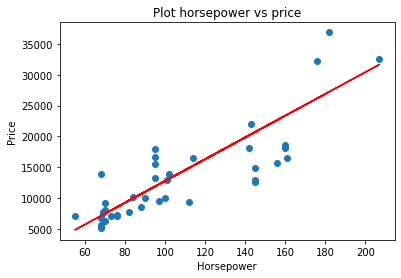

In [32]:
# Membuat visualisasi
y_predict = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_predict, c='r')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Plot horsepower vs price')

In [33]:
# Prediksi harga mobil dengan horse power 100.
lin_reg.predict([[100]])

array([[12771.78050317]])

In [34]:
# Prediksi harga mobil dengan horse power 150.
lin_reg.predict([[150]])

array([[21588.65780191]])

In [35]:
# Prediksi harga mobil dengan horse power 200.
lin_reg.predict([[200]])

array([[30405.53510065]])